### Tract level data compute the area of tracts and geographical distances between tracts

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from libpysal.weights import Queen
from lib import GeoData, load_data


# Load the shapefile
tractfile_path = "/Users/miaoyidi/Library/Mobile Documents/com~apple~CloudDocs/Desktop/partition/hct_case/2023_shape_files/census_shape_tract/tl_2023_42_tract.shp"

# Define your list of GEOIDs
tract_geoid_list = ["1400000US42003498000", "1400000US42003499300", "1400000US42003499400", "1400000US42003500300", "1400000US42003501000",
                    "1400000US42003503002", "1400000US42003504100", "1400000US42003507000", "1400000US42003508000", "1400000US42003509400",
                    "1400000US42003510000", "1400000US42003512000", "1400000US42003513000", "1400000US42003513800", "1400000US42003514000",
                    "1400000US42003515100", "1400000US42003515200", "1400000US42003515300", "1400000US42003515401", "1400000US42003516100",
                    "1400000US42003516200", "1400000US42003517000", "1400000US42003518001", "1400000US42003519000", "1400000US42003520001",
                    "1400000US42003520002", "1400000US42003521200", "1400000US42003521301", "1400000US42003521302", "1400000US42003521401",
                    "1400000US42003521402", "1400000US42003522000", "1400000US42003550900", "1400000US42003551200", "1400000US42003551300",
                    "1400000US42003551900", "1400000US42003552000", "1400000US42003552100", "1400000US42003552200", "1400000US42003552300",
                    "1400000US42003552400", "1400000US42003561400", "1400000US42003561500", "1400000US42003563900", "1400000US42003564200",
                    "1400000US42003564400", "1400000US42003564700"]

tract_geodata = GeoData(tractfile_path, tract_geoid_list)
tract_geodata.plot_graph()

### Block group level

In [2]:
# Load the shapefile
bgfile_path = "/Users/miaoyidi/Library/Mobile Documents/com~apple~CloudDocs/Desktop/partition/hct_case/2023_shape_files/census_shape_block_group/tl_2023_42_bg.shp"
bg_gdf = gpd.read_file(bgfile_path)
bg_gdf["short_GEOID"] = bg_gdf["GEOID"].str[-7:]  # Create a short GEOID column, which also uniquely identifies each block group
bg_gdf.set_index("short_GEOID", inplace=True)  # Set the short GEOID as the index for easier access

# Define your list of GEOIDs
bg_geoid_list = ["1500000US420034980001", "1500000US420034980002", "1500000US420034993001", "1500000US420034993002", "1500000US420034994001",
              "1500000US420034994002", "1500000US420034994003", "1500000US420035003001", "1500000US420035003002", "1500000US420035003003",
              "1500000US420035003004", "1500000US420035010001", "1500000US420035030021", "1500000US420035030022", "1500000US420035030023",
              "1500000US420035030024", "1500000US420035030025", "1500000US420035041001", "1500000US420035041002", "1500000US420035041003",
              "1500000US420035041004", "1500000US420035041005", "1500000US420035070001", "1500000US420035070002", "1500000US420035080001",
              "1500000US420035080002", "1500000US420035094001", "1500000US420035094002", "1500000US420035094003", "1500000US420035094004",
              "1500000US420035094005", "1500000US420035100001", "1500000US420035100002", "1500000US420035120001", "1500000US420035120002",
              "1500000US420035130001", "1500000US420035130002", "1500000US420035138001", "1500000US420035138002", "1500000US420035140001",
              "1500000US420035140002", "1500000US420035151001", "1500000US420035151002", "1500000US420035151003", "1500000US420035152001",
              "1500000US420035152002", "1500000US420035153001", "1500000US420035153002", "1500000US420035154011", "1500000US420035154012",
              "1500000US420035154013", "1500000US420035161001", "1500000US420035162001", "1500000US420035162002", "1500000US420035170001",
              "1500000US420035170002", "1500000US420035180011", "1500000US420035180012", "1500000US420035180013", "1500000US420035190001",
              "1500000US420035190002", "1500000US420035190003", "1500000US420035200011", "1500000US420035200012", "1500000US420035200021",
              "1500000US420035200022", "1500000US420035200023", "1500000US420035212001", "1500000US420035212002", "1500000US420035212003",
              "1500000US420035213011", "1500000US420035213012", "1500000US420035213013", "1500000US420035213014", "1500000US420035213021",
              "1500000US420035213022", "1500000US420035213023", "1500000US420035213024", "1500000US420035214011", "1500000US420035214012",
              "1500000US420035214021", "1500000US420035214022", "1500000US420035214023", "1500000US420035220001", "1500000US420035220002",
              "1500000US420035220003", "1500000US420035509001", "1500000US420035509002", "1500000US420035512001", "1500000US420035512002",
              "1500000US420035512003", "1500000US420035513001", "1500000US420035513002", "1500000US420035519001", "1500000US420035520001",
              "1500000US420035520002", "1500000US420035520003", "1500000US420035520004", "1500000US420035521001", "1500000US420035521002",
              "1500000US420035522001", "1500000US420035523001", "1500000US420035523002", "1500000US420035523003", "1500000US420035524001",
              "1500000US420035524002", "1500000US420035524003", "1500000US420035614001", "1500000US420035614002", "1500000US420035614003",
              "1500000US420035614004", "1500000US420035615001", "1500000US420035615002", "1500000US420035639001", "1500000US420035639002",
              "1500000US420035639003", "1500000US420035639004", "1500000US420035642001", "1500000US420035642002", "1500000US420035642003",
              "1500000US420035644001", "1500000US420035644002", "1500000US420035644003", "1500000US420035644004", "1500000US420035644005",
              "1500000US420035644006", "1500000US420035644007", "1500000US420035647001", "1500000US420035647002", "1500000US420035647003"]

bg_geodata = GeoData(bgfile_path, bg_geoid_list, level='block_group')
bg_geodata.plot_graph(savepath='./figures/')

### Block level

In [3]:
# Load the shapefile
blockfile_path = "/Users/miaoyidi/Library/Mobile Documents/com~apple~CloudDocs/Desktop/partition/hct_case/2023_shape_files/census_shape_block/tl_2023_42_tabblock20.shp"
# Define tract level list of GEOIDs
tract_geoid_list = ["1400000US42003498000", "1400000US42003499300", "1400000US42003499400", "1400000US42003500300", "1400000US42003501000",
                "1400000US42003503002", "1400000US42003504100", "1400000US42003507000", "1400000US42003508000", "1400000US42003509400",
                "1400000US42003510000", "1400000US42003512000", "1400000US42003513000", "1400000US42003513800", "1400000US42003514000",
                "1400000US42003515100", "1400000US42003515200", "1400000US42003515300", "1400000US42003515401", "1400000US42003516100",
                "1400000US42003516200", "1400000US42003517000", "1400000US42003518001", "1400000US42003519000", "1400000US42003520001",
                "1400000US42003520002", "1400000US42003521200", "1400000US42003521301", "1400000US42003521302", "1400000US42003521401",
                "1400000US42003521402", "1400000US42003522000", "1400000US42003550900", "1400000US42003551200", "1400000US42003551300",
                "1400000US42003551900", "1400000US42003552000", "1400000US42003552100", "1400000US42003552200", "1400000US42003552300",
                "1400000US42003552400", "1400000US42003561400", "1400000US42003561500", "1400000US42003563900", "1400000US42003564200",
                "1400000US42003564400", "1400000US42003564700"]

target_tract_suffix_list = ["1000000US" + tract_geoid[9:] for tract_geoid in tract_geoid_list]
block_geodata = GeoData(blockfile_path, target_tract_suffix_list, level='block')
block_geodata.plot_graph(savepath='./figures/')

### Demand data retrieval

#### Load tract level commuting data from CSV

In [5]:
# Load tract level commuting data from CSV

import pandas as pd
commuting_data_path = "/Users/miaoyidi/Library/Mobile Documents/com~apple~CloudDocs/Desktop/partition/hct_case/2023_target_tract_commuting/2023_target_tract_commuting.csv"
commuting_meta_path = "/Users/miaoyidi/Library/Mobile Documents/com~apple~CloudDocs/Desktop/partition/hct_case/2023_target_tract_commuting/ACSST5Y2023.S0801-Column-Metadata.csv"
commuting_data = load_data(commuting_meta_path, commuting_data_path)
selected_columns = ['Geography', 'Geographic Area Name', 'Estimate Total Workers 16 years and over', 'Estimate Total Workers 16 years and over MEANS OF TRANSPORTATION TO WORK Car, truck, or van Carpooled', \
                    'Estimate Total Workers 16 years and over MEANS OF TRANSPORTATION TO WORK Public transportation (excluding taxicab)', \
                    'Estimate Total Workers 16 years and over MEANS OF TRANSPORTATION TO WORK Taxicab, motorcycle, or other means']
commuting_data = commuting_data[selected_columns]
new_column_names = ['GEOID', 'tract_name', 'total_workers', 'car_truck_van_carpool%', 'public_transportation%', 'taxicab_motorcycle_other%']
commuting_data.columns = new_column_names
commuting_data['short_tract_GEOID'] = commuting_data['GEOID'].str[-6:]  # Create a short GEOID column, which also uniquely identifies each block group
# Add new columns for the absolute numbers of workers
commuting_data['car_truck_van_carpool'] = round(commuting_data['total_workers'] * commuting_data['car_truck_van_carpool%'] / 100)
commuting_data['public_transportation'] = round(commuting_data['total_workers'] * commuting_data['public_transportation%'] / 100)
commuting_data['taxicab_motorcycle_other'] = round(commuting_data['total_workers'] * commuting_data['taxicab_motorcycle_other%'] / 100)

commuting_data.head()

,GEOID,tract_name,total_workers,car_truck_van_carpool%,public_transportation%,taxicab_motorcycle_other%,short_tract_GEOID,car_truck_van_carpool,public_transportation,taxicab_motorcycle_other
0,1400000US42003498000,Census Tract 4980; Allegheny County; Pennsylvania,1116,4.4,2.2,0.0,498000,49.0,25.0,0.0
1,1400000US42003499300,Census Tract 4993; Allegheny County; Pennsylvania,650,9.4,4.3,1.7,499300,61.0,28.0,11.0
2,1400000US42003499400,Census Tract 4994; Allegheny County; Pennsylvania,1419,13.6,12.5,6.3,499400,193.0,177.0,89.0
3,1400000US42003500300,Census Tract 5003; Allegheny County; Pennsylvania,1751,8.2,0.7,0.0,500300,144.0,12.0,0.0
4,1400000US42003501000,Census Tract 5010; Allegheny County; Pennsylvania,745,21.3,2.4,1.9,501000,159.0,18.0,14.0


#### Load block group level population data from CSV and calculate the block group population proportion within its tract

In [6]:
# Load block group level population data from CSV
block_group_data_path = "/Users/miaoyidi/Library/Mobile Documents/com~apple~CloudDocs/Desktop/partition/hct_case/2023_target_blockgroup_population/2023_target_blockgroup_population.csv"
block_group_meta_path = "/Users/miaoyidi/Library/Mobile Documents/com~apple~CloudDocs/Desktop/partition/hct_case/2023_target_blockgroup_population/ACSDT5Y2023.B02001-Column-Metadata.csv"
block_group_pop_data = load_data(block_group_meta_path, block_group_data_path)
selected_columns = ['Geography', 'Geographic Area Name', 'Estimate Total:']
block_group_pop_data = block_group_pop_data[selected_columns]
new_column_names = ['GEOID', 'block_group_name', 'total_population']
block_group_pop_data.columns = new_column_names

# Add the new column as the short tract id, which can be obtained from the -7 to -2 characters of the block group id
block_group_pop_data['short_tract_GEOID'] = block_group_pop_data['GEOID'].str[-7:-1]
tract_population = (
    block_group_pop_data
    .groupby('short_tract_GEOID', as_index=False)['total_population']
    .sum()
    .rename(columns={'total_population': 'tract_population'})
)

block_group_pop_data = block_group_pop_data.merge(tract_population, on='short_tract_GEOID', how='left')
# Add a new column for the population percentage
block_group_pop_data['population%'] = block_group_pop_data['total_population'] / block_group_pop_data['tract_population'] * 100
block_group_pop_data.head()


,GEOID,block_group_name,total_population,short_tract_GEOID,tract_population,population%
0,1500000US420034980001,Block Group 1; Census Tract 4980; Allegheny Co...,1204,498000,2302,52.302346
1,1500000US420034980002,Block Group 2; Census Tract 4980; Allegheny Co...,1098,498000,2302,47.697654
2,1500000US420034993001,Block Group 1; Census Tract 4993; Allegheny Co...,558,499300,1542,36.186770
3,1500000US420034993002,Block Group 2; Census Tract 4993; Allegheny Co...,984,499300,1542,63.813230
4,1500000US420034994001,Block Group 1; Census Tract 4994; Allegheny Co...,758,499400,2858,26.522043


#### Derive the number of demands on each block group according to the population proportion

In [7]:
tract_bg_data = pd.merge(commuting_data, block_group_pop_data, on='short_tract_GEOID', how='left')
selected_columns = ["GEOID_y", "block_group_name", "total_population", "tract_population", "population%", "total_workers", "car_truck_van_carpool", "public_transportation", "taxicab_motorcycle_other"]
tract_bg_data = tract_bg_data[selected_columns]
tract_bg_data.rename(columns={"GEOID_y": "bg_GEOID"}, inplace=True)
tract_bg_data.rename(columns={"total_workers": "tract_total_workers"}, inplace=True)
tract_bg_data.rename(columns={"car_truck_van_carpool": "tract_car_truck_van_carpool"}, inplace=True)
tract_bg_data.rename(columns={"public_transportation": "tract_public_transportation"}, inplace=True)
tract_bg_data.rename(columns={"taxicab_motorcycle_other": "tract_taxicab_motorcycle_other"}, inplace=True)
# Add a new column for the total number of car, truck, or van carpooled workers, public transportation workers, and taxicab, motorcycle, or other means workers
tract_bg_data['total_commuting'] = round((tract_bg_data['tract_car_truck_van_carpool'] + tract_bg_data['tract_public_transportation'] + tract_bg_data['tract_taxicab_motorcycle_other']) * tract_bg_data['population%'] / 100)
# Add a new column for the commuting percentage
tract_bg_data['commuting%'] = tract_bg_data['total_commuting'] / tract_bg_data['tract_total_workers'] * 100

tract_bg_data.head()

,bg_GEOID,block_group_name,total_population,tract_population,population%,tract_total_workers,tract_car_truck_van_carpool,tract_public_transportation,tract_taxicab_motorcycle_other,total_commuting,commuting%
0,1500000US420034980001,Block Group 1; Census Tract 4980; Allegheny Co...,1204,2302,52.302346,1116,49.0,25.0,0.0,39.0,3.494624
1,1500000US420034980002,Block Group 2; Census Tract 4980; Allegheny Co...,1098,2302,47.697654,1116,49.0,25.0,0.0,35.0,3.136201
2,1500000US420034993001,Block Group 1; Census Tract 4993; Allegheny Co...,558,1542,36.186770,650,61.0,28.0,11.0,36.0,5.538462
3,1500000US420034993002,Block Group 2; Census Tract 4993; Allegheny Co...,984,1542,63.813230,650,61.0,28.0,11.0,64.0,9.846154
4,1500000US420034994001,Block Group 1; Census Tract 4994; Allegheny Co...,758,2858,26.522043,1419,193.0,177.0,89.0,122.0,8.597604


#### Create a demand dict at block group level

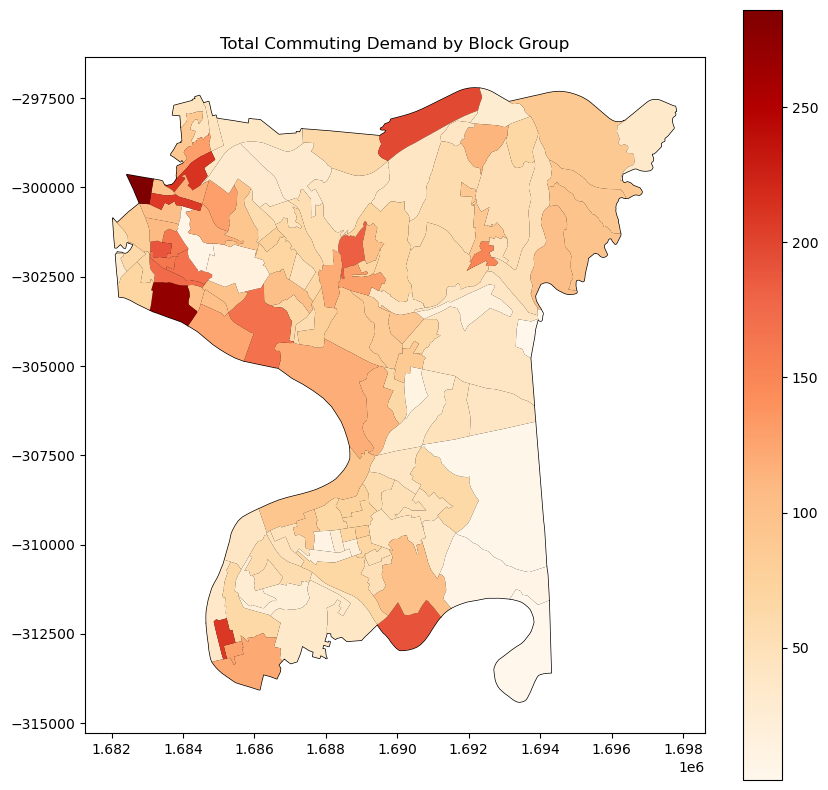

In [8]:
# Create a demand dict at each block group
bg_demand_dict = {}

for index, row in tract_bg_data.iterrows():
    bg_id = row['bg_GEOID'][-7:]
    total_commuting = round(row['total_commuting'])
    car_truck_van_carpool = round(row['tract_car_truck_van_carpool'] * row['population%'] / 100)
    public_transportation = round(row['tract_public_transportation'] * row['population%'] / 100)
    taxicab_motorcycle_other = round(row['tract_taxicab_motorcycle_other'] * row['population%'] / 100)

    bg_demand_dict[bg_id] = {
        'total_commuting': total_commuting,
        'car_truck_van_carpool': car_truck_van_carpool,
        'public_transportation': public_transportation,
        'taxicab_motorcycle_other': taxicab_motorcycle_other
    }

# Create a new column 'total_commuting' by mapping using the index
bg_geodata.gdf['total_commuting'] = bg_geodata.gdf.index.map(lambda x: bg_demand_dict[x]['total_commuting'])

# Create a plot with a base color for the geometries
fig, ax = plt.subplots(figsize=(10, 10))
bg_geodata.gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Overlay the total commuting demand using a colormap
bg_geodata.gdf.plot(column='total_commuting', ax=ax, legend=True, cmap='OrRd')

plt.title("Total Commuting Demand by Block Group")
plt.show()

#### Calculate the demand probability mass on each block group

In [9]:
total_commuting = bg_geodata.gdf['total_commuting'].sum()
print(f"Total commuting demand in the selected block groups: {total_commuting}")
probability_dict = {bg: bg_demand_dict[bg]['total_commuting'] / total_commuting for bg in bg_geodata.short_geoid_list}

Total commuting demand in the selected block groups: 10280


### Hess partition

In [10]:
import numpy as np
import gurobipy as gp
import math
from gurobipy import GRB
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


def Hess_model(block_centers, num_districts, bg_shortest_distance_dict, short_bg_geoid_list):

    assert len(block_centers) == num_districts, f"Got {len(block_centers)} block centers but expected {num_districts} districts"

    assignment_indices = [(bg, center) for bg in short_bg_geoid_list for center in block_centers]

    Hess_model = gp.Model("Hess_model")
    z = Hess_model.addVars(assignment_indices, vtype=GRB.BINARY, name="z")
    Hess_model.addConstrs((gp.quicksum(z[bg, center] for center in block_centers) == 1 for bg in short_bg_geoid_list), name="unique_assignment")
    Hess_model.addConstrs((z[center, center] == 1 for center in block_centers), name="center_selection")
    Hess_model.setObjective(gp.quicksum(z[bg, center] * bg_shortest_distance_dict[(bg, center)] for bg in short_bg_geoid_list for center in block_centers), GRB.MINIMIZE)
    Hess_model.setParam('OutputFlag', 0)
    Hess_model.optimize()

    block_assignment = np.array([[z[bg, center].x for center in block_centers] for bg in short_bg_geoid_list])
    return block_assignment


def recenter(block_centers, block_assignment, bg_shortest_distance_dict, num_districts, short_bg_geoid_list):
    '''
    Recenter the block centers based on the block assignment such that the overall
    travel distance from blocks in that district to the center is minimized
    '''
    assert len(block_centers) == num_districts, f"Got {len(block_centers)} block centers but expected {num_districts} districts"
    new_centers = []

    for old_center_idx in range(num_districts):
        
        blocks_in_district = np.where(block_assignment[:, old_center_idx] == 1)[0]
        recenter_model = gp.Model("recenter_model")
        center_x = recenter_model.addVars(blocks_in_district, vtype=GRB.BINARY, name="z")
        recenter_model.addConstr(gp.quicksum(center_x[i] for i in blocks_in_district) == 1)
        recenter_model.setObjective(gp.quicksum(center_x[i] * bg_shortest_distance_dict[(short_bg_geoid_list[i], short_bg_geoid_list[j])] for i in blocks_in_district for j in blocks_in_district), GRB.MINIMIZE)
        recenter_model.setParam('OutputFlag', 0)
        recenter_model.optimize()

        new_center = blocks_in_district[np.argmax([center_x[i].x for i in blocks_in_district])]
        new_centers.append(new_center)

    return np.array(new_centers)


def SDP(z, num_districts, block_centers, bg_shortest_distance_dict, r, epsilon, short_bg_geoid_list, bg_area_dict):
    '''
    Solve the SDP for lower bound of the problem
    '''

    obj_dict = {} # Dict to store the objective values for each district center: value
    n = len(short_bg_geoid_list)

    for district_idx in range(num_districts):

        model = gp.Model("inner_problem_lower_bound")
        # Add variables
        x = model.addVars(short_bg_geoid_list, lb=0.0, name="x")
        y = model.addVars(short_bg_geoid_list, short_bg_geoid_list, lb=0.0, name='y')

        # Set objective: maximize sum of x_i
        model.setObjective(gp.quicksum(x[short_bg_geoid_list[i]] * math.sqrt(bg_area_dict[short_bg_geoid_list[i]]) * z[i, district_idx] for i in range(n)), GRB.MAXIMIZE)

        # Add quadratic constraint: sum of squares of x_i <= 1
        model.addQConstr(gp.quicksum(x[bg] * x[bg] for bg in short_bg_geoid_list) <= 1, name="quad_constraint")
        model.addConstrs((gp.quicksum(y[bg1, bg2] for bg2 in short_bg_geoid_list) == r[bg1] for bg1 in short_bg_geoid_list), name='y_sum')
        for bg2 in short_bg_geoid_list:
            model.addQConstr((gp.quicksum(y[bg1, bg2] for bg1 in short_bg_geoid_list) >= x[bg2] * x[bg2]), name='y_sumj')

        model.addConstr(gp.quicksum(bg_shortest_distance_dict[(bg1, bg2)] * y[bg1, bg2] for bg1 in short_bg_geoid_list for bg2 in short_bg_geoid_list) <= epsilon, name='wasserstein')
        # Optimize model
        model.setParam('OutputFlag', 0)
        model.optimize()

        district_prob = np.sum([r[short_bg_geoid_list[i]] * z[i, district_idx] for i in range(n)])
        obj_dict[block_centers[district_idx]] = {'bhh': model.objVal, 'district_mass': district_prob}

    return obj_dict


def LP(z, num_districts, block_centers, bg_shortest_distance_dict, r, epsilon, short_bg_geoid_list, bg_area_dict):
    '''
    Solve the LP for upper bound of the problem
    '''

    obj_dict = {} # Dict to store the objective values for each district center: value
    n = len(short_bg_geoid_list)

    for district_idx in range(num_districts):

        model = gp.Model("inner_problem_upper_bound")
        # Add variables
        x = model.addVars(short_bg_geoid_list, lb=0.0, name="x")
        y = model.addVars(short_bg_geoid_list, short_bg_geoid_list, lb=0.0, name='y')

        # Set objective: maximize sum of x_i
        model.setObjective(gp.quicksum(x[short_bg_geoid_list[i]] * z[i, district_idx] for i in range(n)), GRB.MAXIMIZE)

        # Add quadratic constraint: sum of squares of x_i <= 1
        model.addQConstr(x.sum() == 1, name="total_mass")
        model.addConstrs((gp.quicksum(y[bg1, bg2] for bg2 in short_bg_geoid_list) == r[bg1] for bg1 in short_bg_geoid_list), name='y_sum')
        for bg2 in short_bg_geoid_list:
            model.addQConstr((gp.quicksum(y[bg1, bg2] for bg1 in short_bg_geoid_list) == x[bg2]), name='y_sumj')

        model.addConstr(gp.quicksum(bg_shortest_distance_dict[(bg1, bg2)] * y[bg1, bg2] for bg1 in short_bg_geoid_list for bg2 in short_bg_geoid_list) <= epsilon, name='wasserstein')
        # Optimize model
        model.setParam('OutputFlag', 0)
        model.optimize()

        district_area = np.sum([bg_area_dict[short_bg_geoid_list[i]] * z[i, district_idx] for i in range(n)])
        obj_dict[block_centers[district_idx]] = {'bhh': model.objVal, 'district_area': district_area}

    return obj_dict

In [25]:
shortest_paths = dict(nx.all_pairs_dijkstra_path_length(bg_geodata.G, weight='distance'))

In [27]:
bg_geodata.G.edges()

EdgeView([(0, 1), (0, 106), (0, 11), (0, 7), (1, 3), (1, 4), (1, 7), (1, 9), (106, 7), (106, 11), (106, 92), (106, 95), (106, 97), (106, 98), (106, 99), (106, 102), (106, 104), (106, 105), (11, 92), (7, 99), (7, 100), (7, 8), (7, 9), (7, 10), (3, 2), (3, 4), (3, 100), (3, 6), (3, 5), (3, 8), (3, 9), (4, 2), (4, 5), (4, 6), (9, 8), (9, 10), (2, 100), (2, 6), (100, 8), (100, 93), (100, 99), (6, 5), (8, 10), (99, 93), (99, 98), (92, 14), (92, 91), (92, 118), (92, 104), (92, 105), (12, 89), (12, 13), (12, 15), (12, 16), (12, 21), (12, 119), (12, 121), (12, 122), (12, 93), (89, 13), (89, 88), (89, 93), (89, 90), (89, 91), (13, 91), (13, 15), (15, 14), (15, 16), (15, 91), (16, 14), (16, 118), (16, 119), (21, 18), (21, 19), (21, 20), (21, 122), (21, 93), (119, 14), (119, 118), (119, 120), (119, 121), (119, 122), (121, 120), (121, 122), (121, 123), (122, 19), (122, 23), (122, 123), (122, 124), (93, 20), (93, 86), (93, 87), (93, 88), (93, 98), (91, 14), (91, 90), (91, 96), (91, 97), (91, 104), 

In [19]:
# Randomized Heuristic per Validi, Buchanan, and Lykhovyd, 2022
max_iters = 10
num_districts = 3


bg_geoid_list = bg_geodata.geoid_list
short_bg_geoid_list = bg_geodata.short_geoid_list
bg_gdf_subset = bg_geodata.gdf
bg_shortest_distance_dict = bg_geodata.shortest_distance_dict

epsilon = 0.0001
num_blocks = len(bg_gdf_subset)

worst_district_list = []
district_costs_list = []
block_centers_list = []
best_obj_val_lb = float('inf')
best_obj_val = float('inf')
best_block_centers = None

for _ in range(max_iters):
    block_centers = np.random.choice(bg_gdf_subset.index, num_districts, replace=False)
    block_assignment = Hess_model(block_centers, num_districts, bg_shortest_distance_dict, short_bg_geoid_list)
    new_centers = recenter(block_centers, block_assignment, bg_shortest_distance_dict, num_districts, short_bg_geoid_list)
    new_centers = [short_bg_geoid_list[int(center)] for center in new_centers]
    cnt = 0
    print(f"ITERATION {cnt}: Centers updated from {block_centers} to {new_centers}")
    while sorted(block_centers) != sorted(new_centers):
        block_centers = new_centers
        block_assignment = Hess_model(block_centers, num_districts, bg_shortest_distance_dict, short_bg_geoid_list)
        new_centers = recenter(block_centers, block_assignment, bg_shortest_distance_dict, num_districts, short_bg_geoid_list)
        new_centers = [short_bg_geoid_list[int(center)] for center in new_centers]
        cnt += 1
        print(f"ITERATION {cnt}: Centers updated from {block_centers} to {new_centers}")

    # Calculate the lower bound of the objective value for all districts and the worst district
    obj_dict_lb = SDP(block_assignment, num_districts, block_centers, bg_shortest_distance_dict, probability_dict, epsilon, short_bg_geoid_list, bg_area_dict)
    district_lb_costs = [obj_dict_lb[center]['bhh']**2 * obj_dict_lb[center]['district_mass'] for center in block_centers]
    worst_district_lb = max(obj_dict_lb.items(), key=lambda x: x[1]['bhh']**2 * x[1]['district_mass'])
    worst_district_cost_lb = worst_district_lb[1]['bhh']**2 * worst_district_lb[1]['district_mass']

    # Calculate the upper bound of the objective value for all districts and the worst district
    obj_dict_ub = LP(block_assignment, num_districts, block_centers, bg_shortest_distance_dict, probability_dict, epsilon, short_bg_geoid_list, bg_area_dict)
    district_ub_costs = [obj_dict_ub[center]['bhh']**2 * obj_dict_ub[center]['district_area'] for center in block_centers]
    worst_district_ub = max(obj_dict_ub.items(), key=lambda x: x[1]['bhh']**2 * x[1]['district_area'])
    worst_district_cost_ub = worst_district_ub[1]['bhh']**2 * worst_district_ub[1]['district_area']

    print(f"The gap between the lower and upper bound is {worst_district_cost_ub - worst_district_cost_lb}")
    
    worst_district_list.append({'lb': (worst_district_lb, worst_district_cost_lb), 'ub': (worst_district_ub, worst_district_cost_ub)})
    district_costs_list.append({'lb': district_lb_costs, 'ub': district_ub_costs})
    block_centers_list.append(block_centers)
    if worst_district_cost_ub < best_obj_val:
        best_obj_val = worst_district_cost_ub
        best_block_centers = block_centers

print(f"Best block centers: {best_block_centers}")
print(f"Best objective value: {best_obj_val}")
best_assignment = Hess_model(best_block_centers, num_districts, bg_shortest_distance_dict, short_bg_geoid_list)


KeyError: ('4980001', '5003003')

In [16]:
epsilon = 10
obj_dict_lb = SDP(best_assignment, num_districts, best_block_centers, bg_shortest_distance_dict, probability_dict, epsilon, short_bg_geoid_list, bg_area_dict)
obj_dict_ub = LP(best_assignment, num_districts, best_block_centers, bg_shortest_distance_dict, probability_dict, epsilon, short_bg_geoid_list, bg_area_dict)
lb_district_costs = [obj_dict_lb[center]['bhh']**2 * obj_dict_lb[center]['district_mass'] for center in best_block_centers]
ub_district_costs = [obj_dict_ub[center]['bhh']**2 * obj_dict_ub[center]['district_area'] for center in best_block_centers]
worst_district_lb = max(lb_district_costs)
worst_district_ub = max(ub_district_costs)
print(f"Best lower bound district cost: {worst_district_lb}")
print(f"Best upper bound district cost: {worst_district_ub}")

Best lower bound district cost: 21.099176304029317
Best upper bound district cost: 68.03629543454952


In [17]:
worst_district_lbs_ls = []
worst_district_ubs_ls = []
epsilon_values = np.arange(0, 5, 0.1)

for epsilon in epsilon_values:

    obj_dict_lb = SDP(best_assignment, num_districts, best_block_centers, bg_shortest_distance_dict, probability_dict, epsilon, short_bg_geoid_list, bg_area_dict)
    obj_dict_ub = LP(best_assignment, num_districts, best_block_centers, bg_shortest_distance_dict, probability_dict, epsilon, short_bg_geoid_list, bg_area_dict)

    lb_district_costs = [obj_dict_lb[center]['bhh']**2 * obj_dict_lb[center]['district_mass'] for center in best_block_centers]
    ub_district_costs = [obj_dict_ub[center]['bhh']**2 * obj_dict_ub[center]['district_area'] for center in best_block_centers]
    worst_district_lb = max(lb_district_costs)
    worst_district_ub = max(ub_district_costs)
    worst_district_lbs_ls.append(worst_district_lb)
    worst_district_ubs_ls.append(worst_district_ub)
    print(f"Best lower bound district cost: {worst_district_lb}")
    print(f"Best upper bound district cost: {worst_district_ub}")

Best lower bound district cost: 5.057471732867414
Best upper bound district cost: 6.543212945946915
Best lower bound district cost: 6.658973615792033
Best upper bound district cost: 11.069116576690302
Best lower bound district cost: 7.488365992080102
Best upper bound district cost: 13.59040115223906
Best lower bound district cost: 8.16516427789053
Best upper bound district cost: 15.862938670344775
Best lower bound district cost: 8.703790686427245
Best upper bound district cost: 18.065865998384396
Best lower bound district cost: 9.178061654647989
Best upper bound district cost: 20.280056098822737
Best lower bound district cost: 9.619913606687918
Best upper bound district cost: 22.57726332885588
Best lower bound district cost: 10.039335964406684
Best upper bound district cost: 24.840076497676314
Best lower bound district cost: 10.442816309691086
Best upper bound district cost: 27.054526430832667
Best lower bound district cost: 10.831262714046755
Best upper bound district cost: 29.3246586

In [18]:
# Calculate the area of each block group
district_area_dict = {}
for j in range(len(best_block_centers)):
    district_area = sum(bg_area_dict[short_bg_geoid_list[i]] for i in range(len(short_bg_geoid_list)) if best_assignment[i, j] == 1)
    district_area_dict[best_block_centers[j]] = district_area

district_area_dict

{'5212003': 68.03629543454952,
 '5520001': 53.40011429292696,
 '5170001': 26.273641366748418}

In [19]:
district_prob_dict = {}
for j in range(len(best_block_centers)):
    district_prob = sum(probability_dict[short_bg_geoid_list[i]] for i in range(len(short_bg_geoid_list)) if best_assignment[i, j] == 1)
    district_prob_dict[best_block_centers[j]] = district_prob

sum(list(district_prob_dict.values()))

1.0

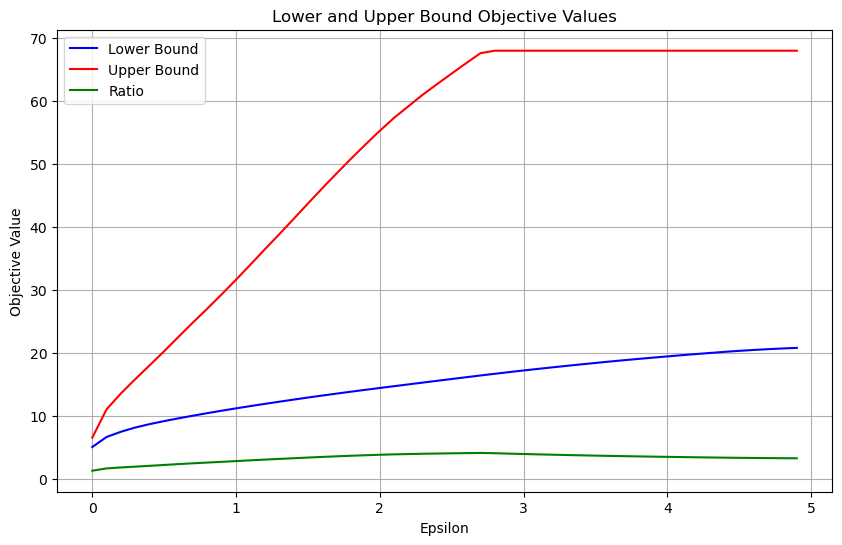

In [20]:
ratios = np.array(worst_district_ubs_ls) / np.array(worst_district_lbs_ls)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, worst_district_lbs_ls, label='Lower Bound', color='blue')
plt.plot(epsilon_values, worst_district_ubs_ls, label='Upper Bound', color='red')
plt.plot(epsilon_values, ratios, label='Ratio', color='green')
plt.xlabel('Epsilon')
plt.ylabel('Objective Value')
plt.title('Lower and Upper Bound Objective Values')
plt.legend()
plt.grid()
plt.show()



In [21]:
# Local searach per Validi, Buchanan, and Lykhovyd, 2022
def local_search(bg_G, block_centers, best_obj_val, bg_shortest_distance_dict, num_districts, short_bg_geoid_list):
    for center in block_centers:
        for neighbor in bg_G.neighbors(center):
            if neighbor not in block_centers:
                new_centers = block_centers.copy()
                new_centers.remove(center)
                new_centers.append(neighbor)
                new_assignment = Hess_model(new_centers, num_districts, bg_shortest_distance_dict, short_bg_geoid_list)
                new_obj_dict = SDP(new_assignment, num_districts, new_centers, bg_shortest_distance_dict, probability_dict, epsilon, short_bg_geoid_list, bg_area_dict)
                new_obj_val_dict = {bg: new_obj_dict[bg]['bhh'] * math.sqrt(new_obj_dict[bg]['district_mass']) for bg in new_obj_dict.keys()}
                new_obj_val = max(new_obj_val_dict.values())
                
                if new_obj_val < best_obj_val:
                    print(f"new obj val: {new_obj_val}")
                    block_centers = new_centers
                    block_assignment = new_assignment
                    best_obj_val = new_obj_val
                    return local_search(bg_G, block_centers, best_obj_val, bg_shortest_distance_dict, num_districts, short_bg_geoid_list)
    return block_centers, best_obj_val

best_block_centers, best_obj_val = local_search(bg_G, best_block_centers, best_obj_val, bg_shortest_distance_dict, num_districts, short_bg_geoid_list)


new obj val: 4.867404581604158
new obj val: 4.688265986563676
new obj val: 4.66356309556722
new obj val: 4.63573076822497
new obj val: 4.3506168360095705
new obj val: 4.156881305590248
new obj val: 4.041586384101316
new obj val: 4.009706022211908
new obj val: 4.004252005649935
new obj val: 3.85251459688664
new obj val: 3.8246828138441566


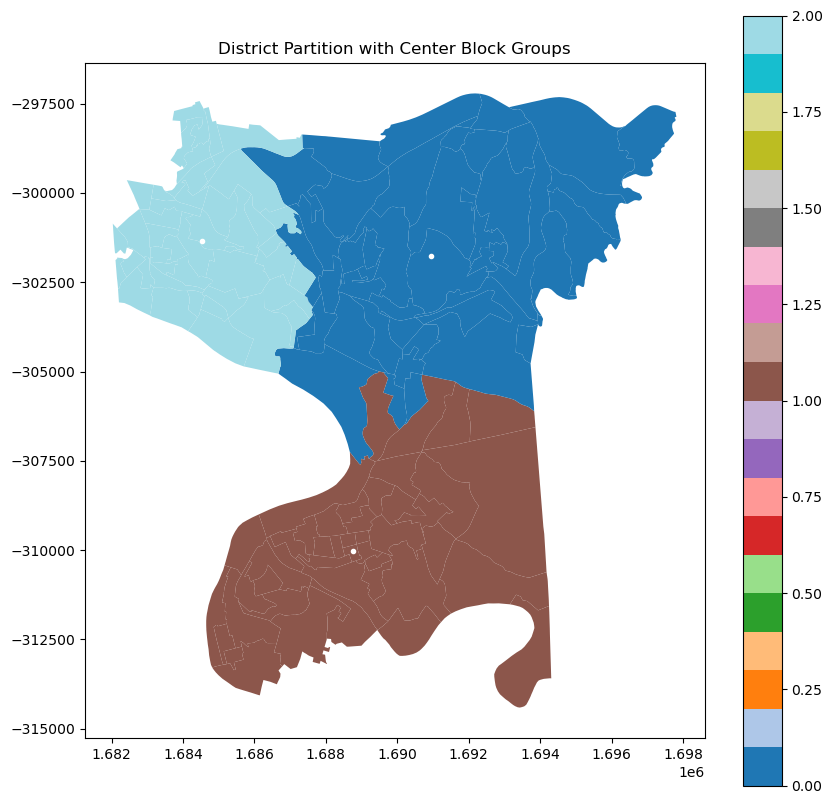

In [22]:
def plot_partition(assignment, gdf):
    """
    Visualize the partition of block groups into districts.
    
    Parameters:
      assignment (np.ndarray): Binary array of shape (n_block_groups, n_centers),
                               where each row has exactly one 1.
      gdf (GeoDataFrame): GeoDataFrame of block groups; order must match assignment rows.
      
    Returns:
      centers (dict): Dictionary mapping each district (center index) to its center block group id.
    """
    # Convert binary assignment to a district label per block group.
    district_labels = np.argmax(assignment, axis=1)
    gdf = gdf.copy()  # avoid modifying the original GeoDataFrame
    gdf['district'] = district_labels

    # Create the plot with a categorical colormap.
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(column='district', cmap='tab20', legend=True, ax=ax)
    
    centers = {}
    # For each district, determine the center block group.
    for district in np.unique(district_labels):
        subset = gdf[gdf['district'] == district]
        # Compute centroids of the block groups in this district.
        centroids = subset.geometry.centroid
        # Compute the average centroid (district centroid)
        avg_x = centroids.x.mean()
        avg_y = centroids.y.mean()
        # Find the block group whose centroid is closest to the district centroid.
        distances = centroids.apply(lambda geom: ((geom.x - avg_x)**2 + (geom.y - avg_y)**2)**0.5)
        center_idx = distances.idxmin()  # center's index (e.g., GEOID)
        centers[district] = center_idx
        
        # # Plot the boundary of the center block group with a thicker line.
        # subset.loc[[center_idx]].boundary.plot(ax=ax, edgecolor='black', linewidth=3)
        # Optionally, add a marker at the center.
        # ax.plot(centroids.loc[center_idx].x, centroids.loc[center_idx].y, marker='o',
        #         color='white', markersize=3)
        ax.plot(avg_x, avg_y, marker='o',
                color='white', markersize=3)
    
    plt.title("District Partition with Center Block Groups")
    plt.show()
    
    return centers

district_centers = plot_partition(best_assignment, bg_gdf_subset)

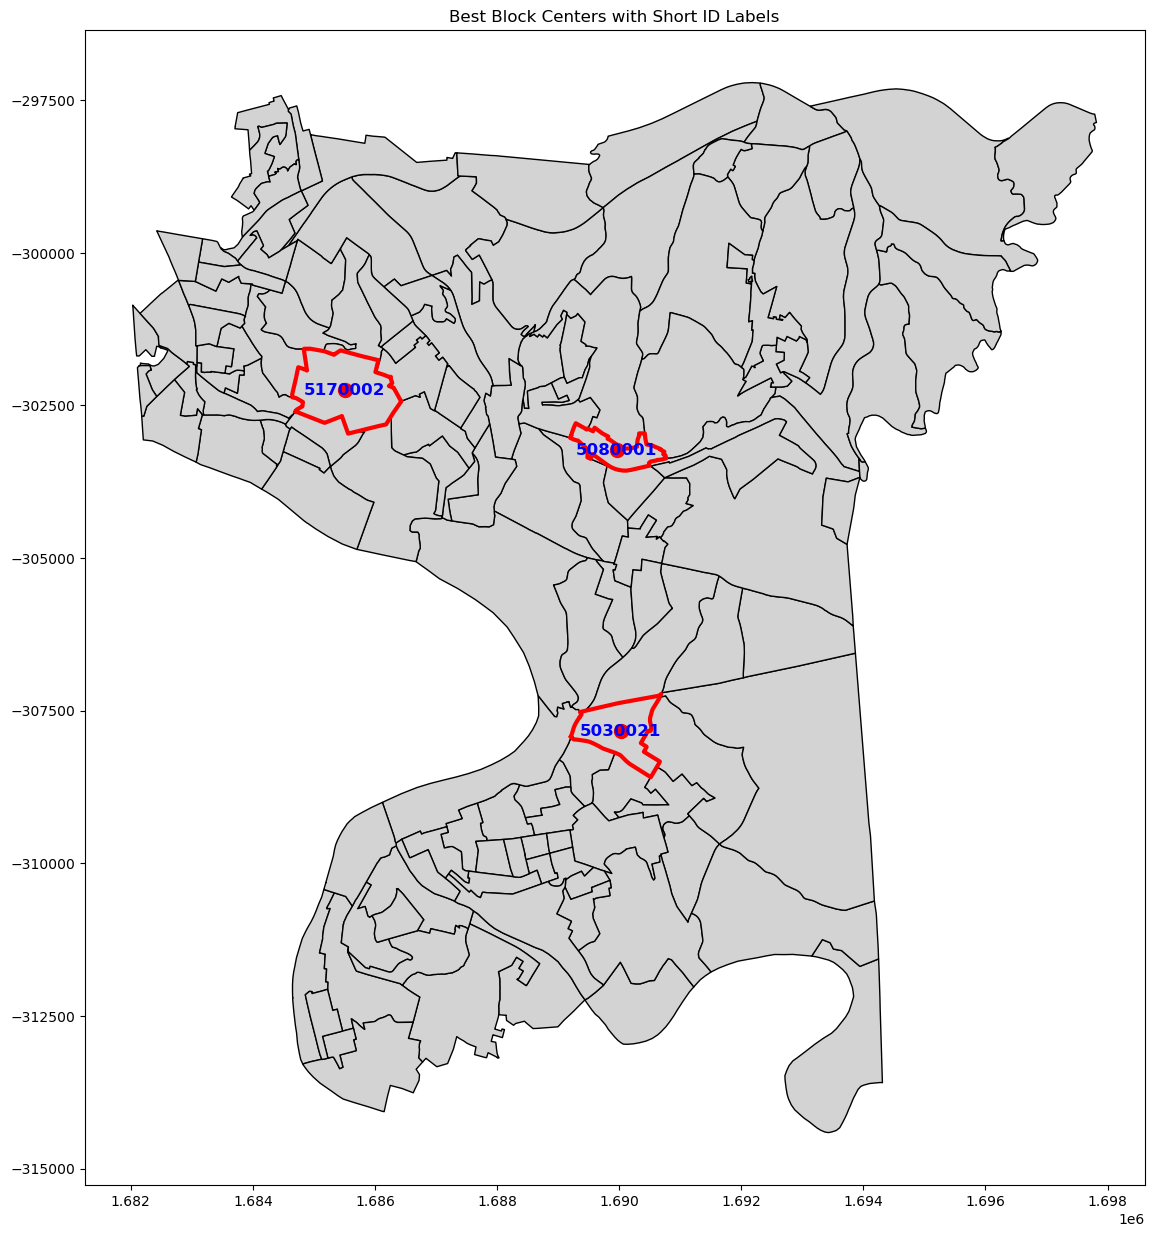

In [23]:
# Show the best block centers on the map with their short id as labels
fig, ax = plt.subplots(figsize=(15, 15))
bg_gdf_subset.plot(ax=ax, color='lightgrey', edgecolor='black')

for center in best_block_centers:
    # Get the geometry of the center block group based on its index or id.
    center_geom = bg_gdf_subset.loc[bg_gdf_subset.index == center].geometry.values[0]
    # Plot the center block group with a thicker red edge.
    ax.plot(*center_geom.exterior.xy, color='red', linewidth=3)
    # Compute the centroid of the block group.
    center_point = center_geom.centroid
    # Plot a marker at the centroid.
    ax.plot(center_point.x, center_point.y, marker='o', color='red', markersize=10)
    # Place the short id label near the centroid.
    # Adjust horizontal (ha) and vertical (va) alignment as needed.
    ax.text(center_point.x, center_point.y, str(center), fontsize=12, color='blue',
            ha='center', va='center', fontweight='bold')

plt.title("Best Block Centers with Short ID Labels")
plt.show()

# HCT routes on block group level

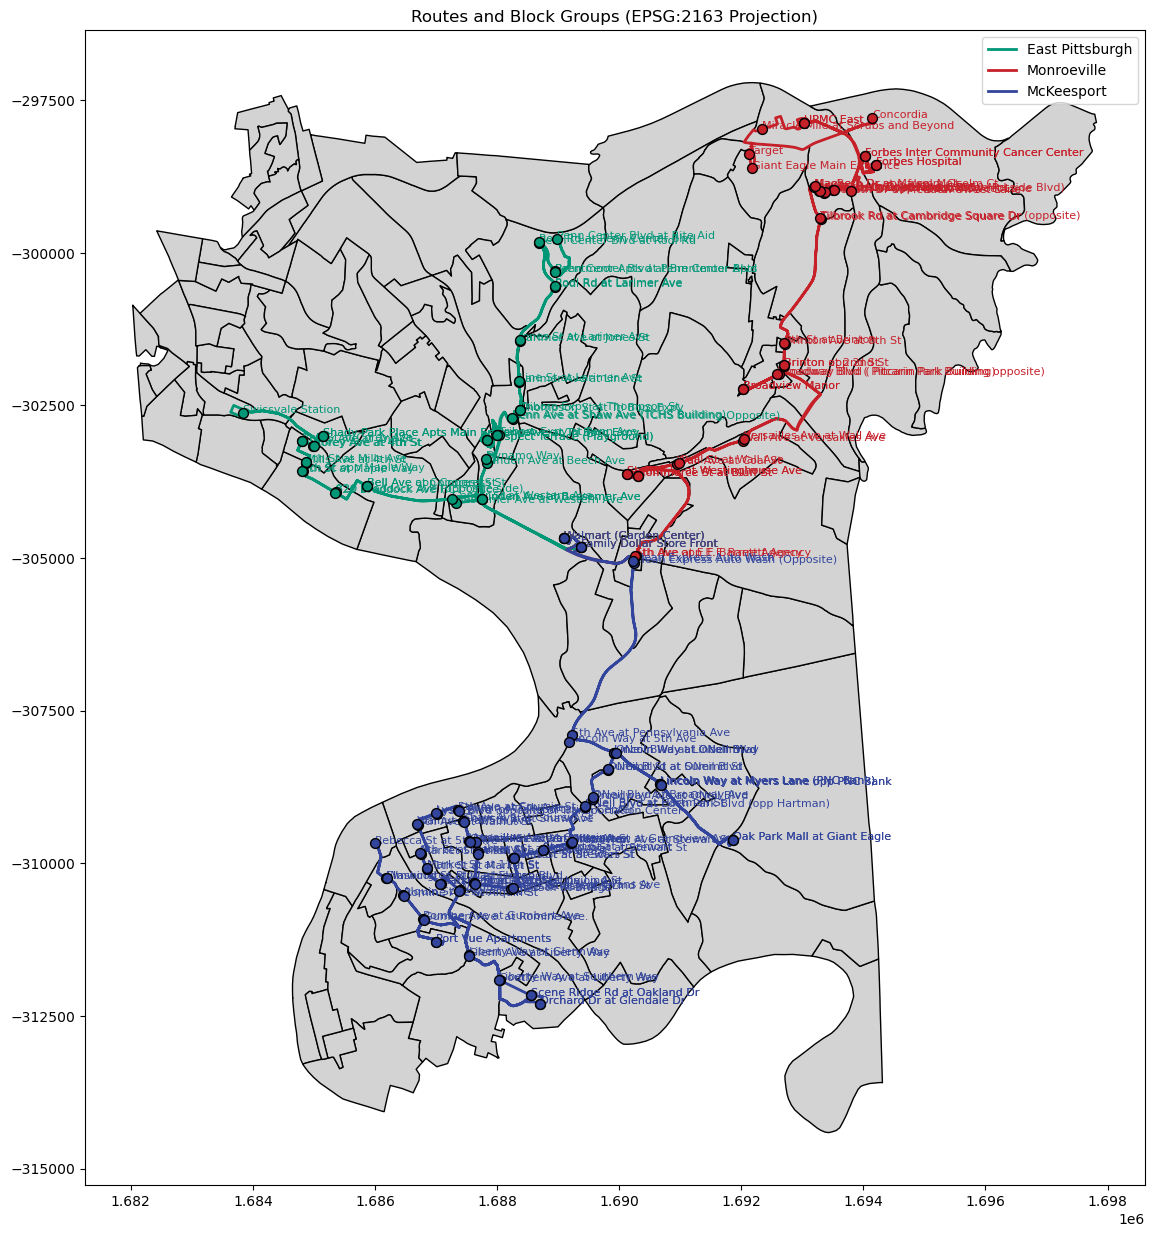

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
import polyline
import json
from shapely.geometry import LineString, Point
from shapely.ops import transform
from pyproj import Transformer

# Load the routes info from a JSON file
with open("./hct_routes.json", "r") as f:
    routes_info = json.load(f)

# Create a transformer from EPSG:4326 (lat/lon) to EPSG:2163 (projected in meters)
transformer = Transformer.from_crs("EPSG:4326", "EPSG:2163", always_xy=True)

def project_geometry(geometry):
    """Project a shapely geometry from EPSG:4326 to EPSG:2163."""
    return transform(transformer.transform, geometry)

def visualize_routes_and_blockgroups(blockgroup_gdf, routes_info):
    """
    Visualize routes overlaid on block groups (projected in EPSG:2163),
    and return a dictionary mapping each route name to a list of stop info.
    
    Parameters:
      blockgroup_gdf (GeoDataFrame): Block group polygons (CRS EPSG:2163).
      routes_info (list): List of route dictionaries, each with keys:
          - "Description": route name.
          - "EncodedPolyline": encoded polyline string.
          - "MapLineColor": color for plotting.
          - "Stops": list of stop dictionaries with keys "Latitude", "Longitude", "Description".
          
    Returns:
      dict: Keys are route names, and values are lists of stop info dictionaries.
    """
    stops_dict = {}
    
    fig, ax = plt.subplots(figsize=(15, 15))
    
    # Plot block groups as the base layer (already in EPSG:2163)
    blockgroup_gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
    
    for route in routes_info:
        route_name = route.get("Description", "Unnamed Route")
        encoded_poly = route.get("EncodedPolyline")
        color = route.get("MapLineColor", "#000000")
        stops = route.get("Stops", [])
        
        # Decode the polyline (originally in lat/lon) and project to EPSG:2163.
        if encoded_poly:
            try:
                # Decode returns (lat, lng) pairs. Swap to (lng, lat) for shapely.
                coords = polyline.decode(encoded_poly)
                coords_swapped = [(lng, lat) for lat, lng in coords]
                route_line = LineString(coords_swapped)
                projected_line = project_geometry(route_line)
                ax.plot(*projected_line.xy, color=color, linewidth=2, label=route_name)
            except Exception as e:
                print(f"Error decoding polyline for route '{route_name}': {e}")
        
        route_stops = []
        for stop in stops:
            lat = stop.get("Latitude")
            lng = stop.get("Longitude")
            desc = stop.get("Description", "")
            route_stops.append({"Latitude": lat, "Longitude": lng, "Description": desc})
            
            # Create a Point and project it
            pt = Point(lng, lat)
            projected_pt = project_geometry(pt)
            ax.scatter(projected_pt.x, projected_pt.y, color=color, s=50, edgecolor='k', zorder=5)
            ax.text(projected_pt.x, projected_pt.y, desc, fontsize=8, color=color)
        
        stops_dict[route_name] = route_stops

    ax.set_title("Routes and Block Groups (EPSG:2163 Projection)")
    ax.legend()
    plt.show()
    
    return stops_dict

# Example usage:
# blockgroup_gdf = gpd.read_file("path/to/blockgroup_shapefile.shp")  # Must be in EPSG:2163.
# with open("path/to/routes_info.json", "r") as f:
#     routes_info = json.load(f)
# stops_by_route = visualize_routes_and_blockgroups(blockgroup_gdf, routes_info)

# Example usage:
# Assume you have a GeoDataFrame 'bg_gdf' for block groups
# and a list 'routes' containing your route dictionaries.
stops_by_route = visualize_routes_and_blockgroups(bg_gdf_subset, routes_info)

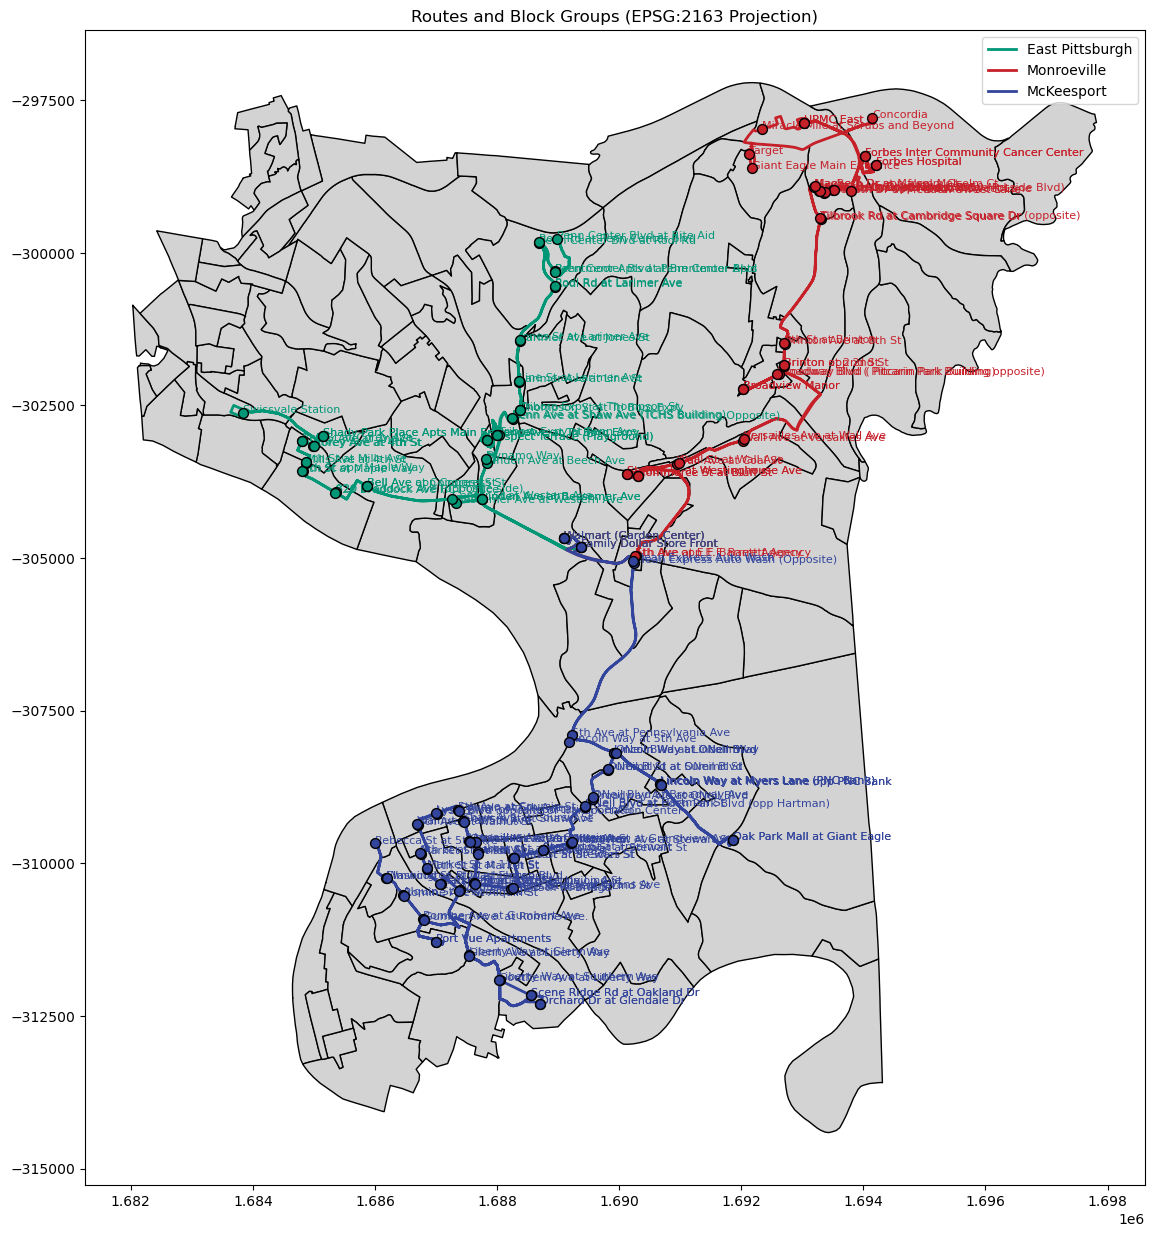

/var/folders/bj/5v0f_0cn721053_2r6b74pbc0000gn/T/ipykernel_67719/2574446765.py:149: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set1', len(unique_districts))
/var/folders/bj/5v0f_0cn721053_2r6b74pbc0000gn/T/ipykernel_67719/2574446765.py:189: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


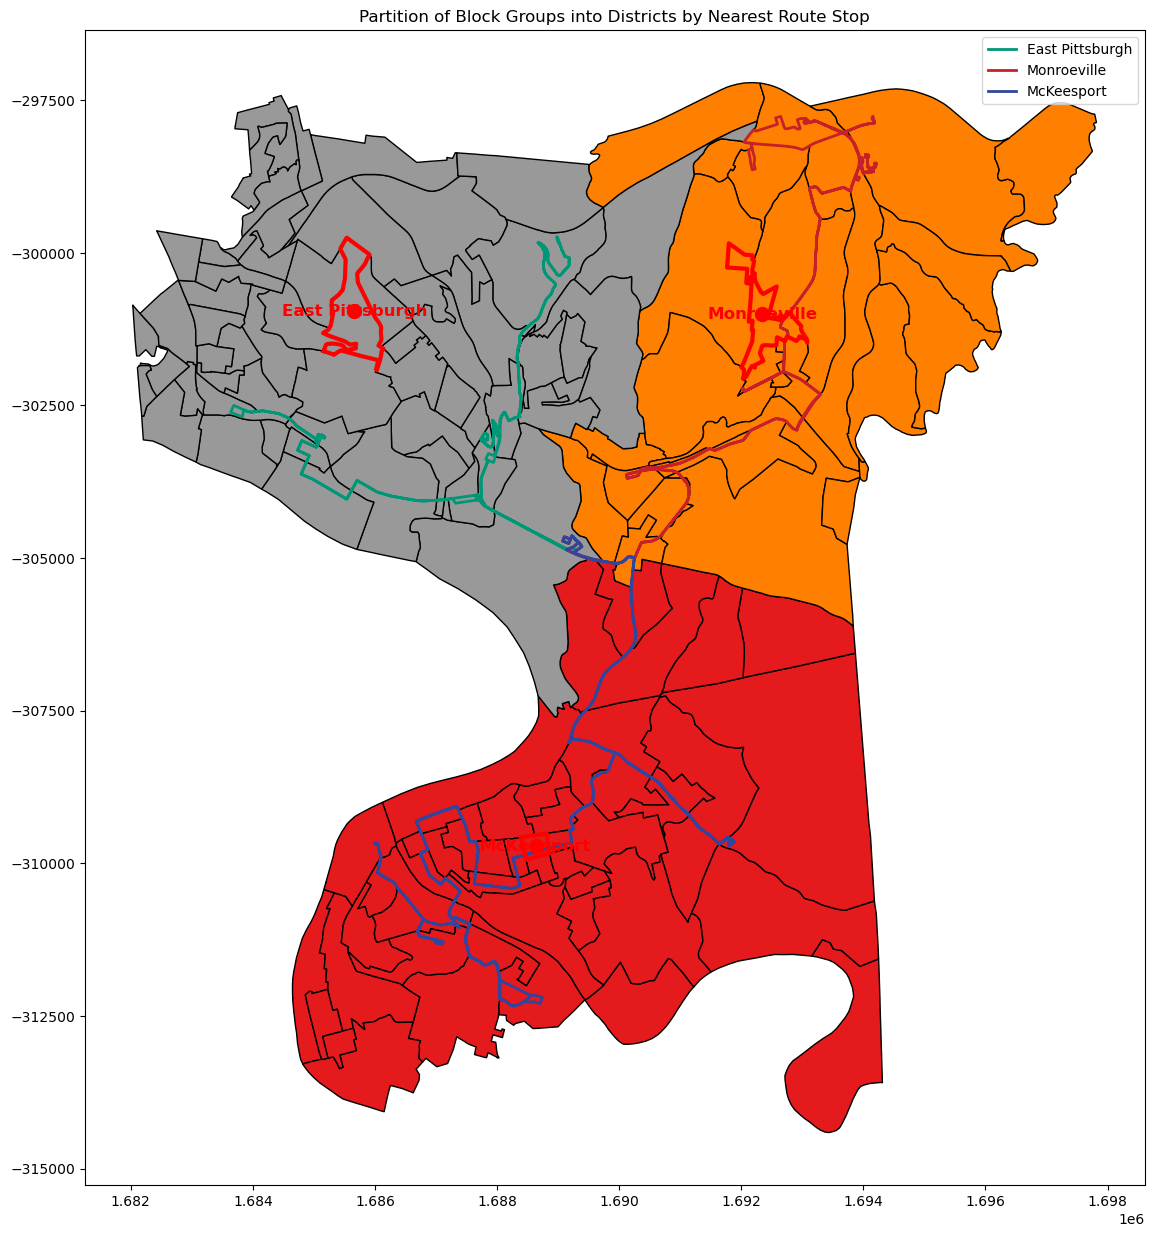

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
import polyline
import json
import numpy as np
from shapely.geometry import LineString, Point
from shapely.ops import transform
from pyproj import Transformer
import matplotlib.cm as cm

# ---------------------------
# Data Loading and Projection Setup
# ---------------------------

# Load the routes info from a JSON file.
with open("./hct_routes.json", "r") as f:
    routes_info = json.load(f)

# It is assumed that your GeoDataFrame bg_gdf_subset is already loaded and projected in EPSG:2163.
# For example:
# bg_gdf_subset = gpd.read_file("path/to/blockgroup_shapefile.shp")
# bg_gdf_subset = bg_gdf_subset.to_crs("EPSG:2163")

# ---------------------------
# Projection Function
# ---------------------------
# Create a transformer from EPSG:4326 (lat/lon) to EPSG:2163 (meters)
transformer = Transformer.from_crs("EPSG:4326", "EPSG:2163", always_xy=True)

def project_geometry(geometry):
    """Project a shapely geometry from EPSG:4326 to EPSG:2163."""
    return transform(transformer.transform, geometry)

# ---------------------------
# Visualize Routes and Block Groups
# ---------------------------
def visualize_routes_and_blockgroups(blockgroup_gdf, routes_info):
    """
    Plot block groups as the base layer and overlay the routes (decoded from encoded polylines)
    along with their stops.
    
    Parameters:
      blockgroup_gdf (GeoDataFrame): Block group polygons (CRS EPSG:2163).
      routes_info (list): Route dictionaries containing keys:
          - "Description": route name.
          - "EncodedPolyline": encoded polyline.
          - "MapLineColor": color.
          - "Stops": list of stop dictionaries with keys "Latitude", "Longitude", "Description".
    
    Returns:
      dict: Mapping from route name to its list of stops (each as a dictionary).
    """
    stops_dict = {}
    fig, ax = plt.subplots(figsize=(15, 15))
    
    # Plot block groups as the base layer.
    blockgroup_gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
    
    for route in routes_info:
        route_name = route.get("Description", f"Route {route.get('RouteID', 'Unknown')}")
        encoded_poly = route.get("EncodedPolyline")
        line_color = route.get("MapLineColor", "#000000")
        stops = route.get("Stops", [])
        
        # Decode and project the route polyline.
        if encoded_poly:
            try:
                coords = polyline.decode(encoded_poly)  # returns (lat, lng) pairs
                # Swap to (lng, lat) for shapely.
                coords_swapped = [(lng, lat) for lat, lng in coords]
                route_line = LineString(coords_swapped)
                projected_line = project_geometry(route_line)
                ax.plot(*projected_line.xy, color=line_color, linewidth=2, label=route_name)
            except Exception as e:
                print(f"Error decoding polyline for route '{route_name}': {e}")
        
        # Plot each stop.
        for stop in stops:
            lat = stop.get("Latitude")
            lng = stop.get("Longitude")
            desc = stop.get("Description", "")
            pt = Point(lng, lat)
            projected_pt = project_geometry(pt)
            ax.scatter(projected_pt.x, projected_pt.y, color=line_color, s=50, edgecolor='k', zorder=5)
            ax.text(projected_pt.x, projected_pt.y, desc, fontsize=8, color=line_color)
        
        stops_dict[route_name] = stops

    ax.set_title("Routes and Block Groups (EPSG:2163 Projection)")
    ax.legend()
    plt.show()
    return stops_dict

# Run visualization (this shows your current routes over block groups).
stops_by_route = visualize_routes_and_blockgroups(bg_gdf_subset, routes_info)

# ---------------------------
# Partition Block Groups into Districts Based on Nearest Stop
# ---------------------------
# We assign each block group (using its centroid) to the district (route) of the nearest stop.
district_assignment = {}  # mapping: block group index -> route name

for idx, row in bg_gdf_subset.iterrows():
    centroid = row.geometry.centroid
    best_route = None
    best_distance = float('inf')
    # Loop over all routes and their stops.
    for route in routes_info:
        route_name = route.get("Description", f"Route {route.get('RouteID', 'Unknown')}")
        stops = route.get("Stops", [])
        for stop in stops:
            pt = Point(stop.get("Longitude"), stop.get("Latitude"))
            # Project stop coordinates to EPSG:2163.
            pt_proj = project_geometry(pt)
            d = centroid.distance(pt_proj)
            if d < best_distance:
                best_distance = d
                best_route = route_name
    district_assignment[idx] = best_route

# Add a new column for district assignment in the GeoDataFrame.
bg_gdf_subset['district'] = bg_gdf_subset.index.map(district_assignment)

# ---------------------------
# Determine the Center Block Group for Each District
# ---------------------------
# We choose, for each district, the block group whose centroid is closest to the mean centroid.
center_block_groups = {}  # mapping: district -> block group index (the "center")
for district, group in bg_gdf_subset.groupby('district'):
    # Compute centroids of all block groups in this district.
    centroids = group.geometry.centroid
    mean_x = centroids.x.mean()
    mean_y = centroids.y.mean()
    mean_point = Point(mean_x, mean_y)
    best_idx = None
    best_distance = float('inf')
    for idx, geom in group.geometry.items():
        dist = geom.centroid.distance(mean_point)
        if dist < best_distance:
            best_distance = dist
            best_idx = idx
    center_block_groups[district] = best_idx

# ---------------------------
# Plot the Partition and the Center Block Groups
# ---------------------------
# Create a unique color for each district.
unique_districts = bg_gdf_subset['district'].unique()
cmap = cm.get_cmap('Set1', len(unique_districts))
color_map = {d: cmap(i) for i, d in enumerate(unique_districts)}

fig, ax = plt.subplots(figsize=(15, 15))
# Plot each block group colored by its district.
for district in unique_districts:
    subset = bg_gdf_subset[bg_gdf_subset['district'] == district]
    subset.plot(ax=ax, color=color_map[district], edgecolor='black', label=str(district))

# Overlay the routes.
for route in routes_info:
    route_name = route.get("Description", f"Route {route.get('RouteID', 'Unknown')}")
    encoded_poly = route.get("EncodedPolyline")
    line_color = route.get("MapLineColor", "#000000")
    if encoded_poly:
        try:
            coords = polyline.decode(encoded_poly)
            coords_swapped = [(lng, lat) for lat, lng in coords]
            route_line = LineString(coords_swapped)
            projected_line = project_geometry(route_line)
            ax.plot(*projected_line.xy, color=line_color, linewidth=2, label=route_name)
        except Exception as e:
            print(f"Error decoding polyline for route '{route_name}': {e}")

# Plot the center block groups with a thick red outline and add a label.
for district, center_idx in center_block_groups.items():
    center_geom = bg_gdf_subset.loc[center_idx].geometry
    # Plot the boundary of the center block group with a thick red line.
    try:
        ax.plot(*center_geom.exterior.xy, color='red', linewidth=3)
    except AttributeError:
        # In case the geometry is not a polygon with an exterior (e.g., a MultiPolygon), use its boundary.
        ax.plot(*center_geom.boundary.xy, color='red', linewidth=3)
    # Place a label at the centroid.
    center_point = center_geom.centroid
    ax.plot(center_point.x, center_point.y, marker='o', color='red', markersize=10)
    ax.text(center_point.x, center_point.y, str(district), fontsize=12, fontweight='bold',
            color='red', ha='center', va='center')

plt.title("Partition of Block Groups into Districts by Nearest Route Stop")
plt.legend()
plt.show()

In [26]:
route_lengths = {}
route_projected_stops = {}

# Loop over each route in the routes_info.
for route in routes_info:
    route_name = route.get("Description", "Unnamed Route")
    encoded_poly = route.get("EncodedPolyline")
    stops = route.get("Stops", [])
    
    # Calculate route length if the polyline exists.
    if encoded_poly:
        try:
            coords = polyline.decode(encoded_poly)
            coords_swapped = [(lng, lat) for lat, lng in coords]
            route_line = LineString(coords_swapped)
            projected_line = project_geometry(route_line)
            length = projected_line.length  # Length in meters (since EPSG:2163 uses meters)
            route_lengths[route_name] = length
        except Exception as e:
            print(f"Error decoding polyline for route '{route_name}': {e}")
    
    # Process the stops: project each stop to EPSG:2163.
    projected_stops = []
    for stop in stops:
        lat = stop.get("Latitude")
        lng = stop.get("Longitude")
        pt = Point(lng, lat)
        projected_pt = project_geometry(pt)
        projected_stops.append(projected_pt)
    route_projected_stops[route_name] = projected_stops

# Print out the lengths of each route.
print("Route Lengths (meters):")
for route_name, length in route_lengths.items():
    print(f"  {route_name}: {length:.2f} m")



def calculate_total_travel_times(routes_info):
    """
    Calculate the total travel time for each route by summing the "SecondsToNextStop" 
    values of its stops.

    Parameters:
      routes_info (list): List of route dictionaries. Each route dictionary should have:
                          - "Description": a string describing the route.
                          - "Stops": a list of stop dictionaries, where each stop
                                     dictionary contains a "SecondsToNextStop" key.
    
    Returns:
      dict: A dictionary mapping route descriptions (or route IDs) to the total travel time in seconds.
    """
    travel_times = {}
    for route in routes_info:
        # Use the route's description if available; otherwise, fall back on RouteID.
        route_name = route.get("Description", f"Route {route.get('RouteID', 'Unknown')}")
        stops = route.get("Stops", [])
        # Sum the travel times for all stops in the route.
        total_time = sum(stop.get("SecondsToNextStop", 0) for stop in stops)
        travel_times[route_name] = total_time
    return travel_times

# For demonstration, here's how you would call the function:
travel_times = calculate_total_travel_times(routes_info)

# Print the travel times per route.
for route, time_sec in travel_times.items():
    print(f"Total travel time for '{route}': {time_sec} seconds")

for route_name, travel_time in travel_times.items():
    print(f"Route: {route_name}, Total Travel Time: {travel_time} seconds")
    print(f"Speed (assuming constant speed): {route_lengths[route_name] / travel_time} m/s")


Route Lengths (meters):
  East Pittsburgh: 40850.69 m
  Monroeville: 43854.69 m
  McKeesport: 57924.55 m
Total travel time for 'East Pittsburgh': 7588 seconds
Total travel time for 'Monroeville': 8657 seconds
Total travel time for 'McKeesport': 11263 seconds
Route: East Pittsburgh, Total Travel Time: 7588 seconds
Speed (assuming constant speed): 5.383591315409894 m/s
Route: Monroeville, Total Travel Time: 8657 seconds
Speed (assuming constant speed): 5.065806700817984 m/s
Route: McKeesport, Total Travel Time: 11263 seconds
Speed (assuming constant speed): 5.142906324019926 m/s


### Walk time

In [27]:
# Compute the weighted sum of distances (from block group centers to the nearest stops) for each route (weighted by block group probability mass)
# but only over block groups that are assigned to the route via district_assignment.
results = {}  # results[route_name] = weighted sum (in meters)

for route_name, stops in route_projected_stops.items():
    weighted_sum = 0.0
    # Loop over all block groups.
    for idx, row in bg_gdf_subset.iterrows():
        # Only consider block groups assigned to the current route.
        if district_assignment.get(idx) == route_name:
            centroid = row.geometry.centroid
            # Compute the minimum distance from the block group centroid to any stop on the current route.
            if stops:
                distances = [centroid.distance(stop) for stop in stops]
                min_distance = min(distances)
            else:
                print(f"No stops found for route '{route_name}'")
                min_distance = 0.0
            
            # Get the probability mass (weight) for the block group.
            # Assumes that the probability_dict uses the block group index as key.
            weight = probability_dict.get(idx, 0)
            weighted_sum += min_distance * weight
    results[route_name] = weighted_sum

# Print out the weighted sum of distances (in meters) for each route.
print("\nWeighted Sum of Distances (in meters) by Route:")
for route_name, w_sum in results.items():
    print(f"Route '{route_name}': {w_sum:.2f} m")

# Calculate the probability mass for each district
district_prob_dict = {}
for district, group in bg_gdf_subset.groupby('district'):
    district_prob = sum(probability_dict[i] for i in group.index)
    district_prob_dict[district] = district_prob

print(f"Total expected walk distance: {sum([results[route] * district_prob_dict[route] for route in results])}")

# If walking speed is 1.4 m/s, convert the expected walk distance to time in seconds
walking_speed = 1.4  # m/s
expected_walk_time = sum([results[route] * district_prob_dict[route] for route in results]) / walking_speed
print(f"Expected walk time: {expected_walk_time} seconds")


# max walk distance and time
max_walk_distance = 0.0
max_walk_info = {}  # to store details: block group index, assigned route, and distance

for idx, row in bg_gdf_subset.iterrows():
    assigned_route = district_assignment.get(idx)
    if assigned_route is not None:
        stops = route_projected_stops.get(assigned_route, [])
        if stops:
            centroid = row.geometry.centroid
            distances = [centroid.distance(stop) for stop in stops]
            min_distance = min(distances)
            # Update maximal distance if this block group's value is higher.
            if min_distance > max_walk_distance:
                max_walk_distance = min_distance
                max_walk_info = {
                    "block_group_index": idx,
                    "assigned_route": assigned_route,
                    "min_distance": min_distance
                }
        else:
            print(f"No stops found for route '{assigned_route}' assigned to block group {idx}")
    else:
        # If a block group is not assigned to any route, skip it.
        continue

print("\nMaximal Walk Distance Across All Block Groups:")
print(f"The maximal walk distance is {max_walk_distance:.5f} m.")
print(f"The maximal walk time: {max_walk_distance / walking_speed:.5f} seconds")
if max_walk_info:
    print(f"Block group {max_walk_info['block_group_index']} (assigned to route '{max_walk_info['assigned_route']}') "
          f"has the maximal walk distance of {max_walk_distance:.5f} m.")


Weighted Sum of Distances (in meters) by Route:
Route 'East Pittsburgh': 785.15 m
Route 'Monroeville': 160.48 m
Route 'McKeesport': 280.91 m
Total expected walk distance: 541.094593771724
Expected walk time: 386.49613840837435 seconds

Maximal Walk Distance Across All Block Groups:
The maximal walk distance is 4618.32809 m.
The maximal walk time: 3298.80578 seconds
Block group 5614002 (assigned to route 'East Pittsburgh') has the maximal walk distance of 4618.32809 m.


Intersection of the three routes: {'Family Dollar Store Front', 'Walmart (Garden Center)'}


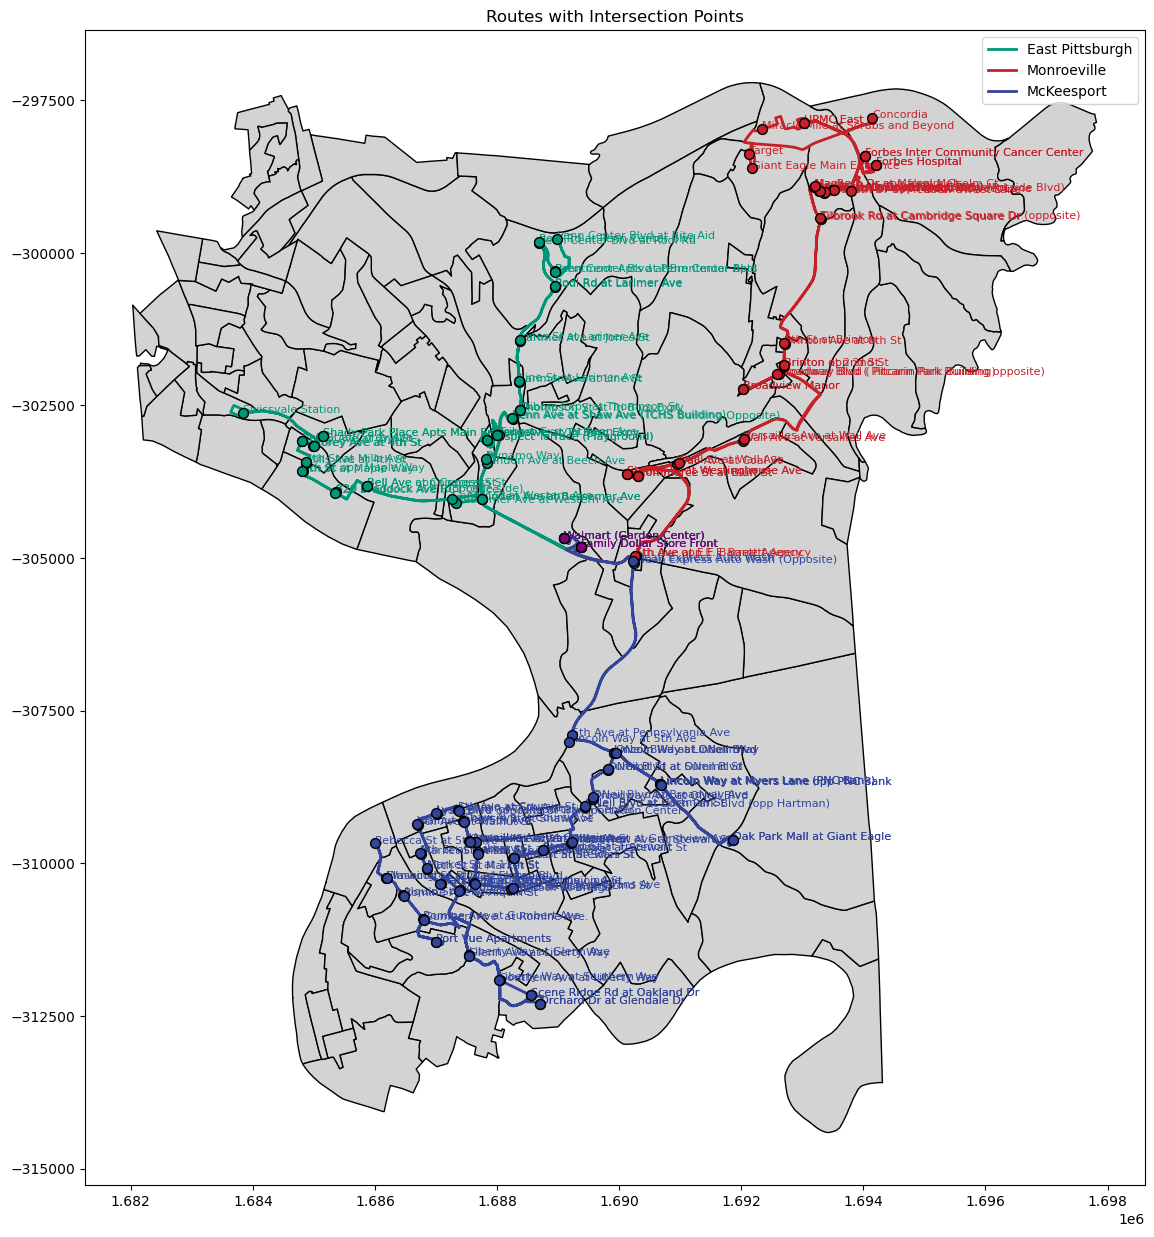

In [39]:
route0 = {stop_info['Description']: stop_info for stop_info in routes_info[0].get("Stops", [])}
route1 = {stop_info['Description']: stop_info for stop_info in routes_info[1].get("Stops", [])}
route2 = {stop_info['Description']: stop_info for stop_info in routes_info[2].get("Stops", [])}
# Find the intersection of the three routes
intersection = set(route0.keys()).intersection(set(route1.keys())).intersection(set(route2.keys()))
print(f"Intersection of the three routes: {intersection}")

# Plot the routes with the intersection points
fig, ax = plt.subplots(figsize=(15, 15))
# Plot block groups as the base layer.
bg_gdf_subset.plot(ax=ax, color='lightgrey', edgecolor='black')
for route in routes_info:
    route_name = route.get("Description", f"Route {route.get('RouteID', 'Unknown')}")
    encoded_poly = route.get("EncodedPolyline")
    line_color = route.get("MapLineColor", "#000000")
    stops = route.get("Stops", [])
    
    # Decode and project the route polyline.
    if encoded_poly:
        try:
            coords = polyline.decode(encoded_poly)  # returns (lat, lng) pairs
            coords_swapped = [(lng, lat) for lat, lng in coords]
            route_line = LineString(coords_swapped)
            projected_line = project_geometry(route_line)
            ax.plot(*projected_line.xy, color=line_color, linewidth=2, label=route_name)
        except Exception as e:
            print(f"Error decoding polyline for route '{route_name}': {e}")

    # Plot each stop.
    for stop in stops:
        lat = stop.get("Latitude")
        lng = stop.get("Longitude")
        desc = stop.get("Description", "")
        pt = Point(lng, lat)
        projected_pt = project_geometry(pt)
        ax.scatter(projected_pt.x, projected_pt.y, color=line_color, s=50, edgecolor='k', zorder=5)
        ax.text(projected_pt.x, projected_pt.y, desc, fontsize=8, color=line_color)

# Plot the intersection points
for stop in intersection:
    stop_info = route0.get(stop) or route1.get(stop) or route2.get(stop)
    lat = stop_info.get("Latitude")
    lng = stop_info.get("Longitude")
    pt = Point(lng, lat)
    projected_pt = project_geometry(pt)
    ax.scatter(projected_pt.x, projected_pt.y, color='purple', s=50, edgecolor='k', zorder=5)
    ax.text(projected_pt.x, projected_pt.y, stop, fontsize=8, color='purple')
plt.title("Routes with Intersection Points")
plt.legend()
plt.show()
